Mean Squared Error: 129713.63


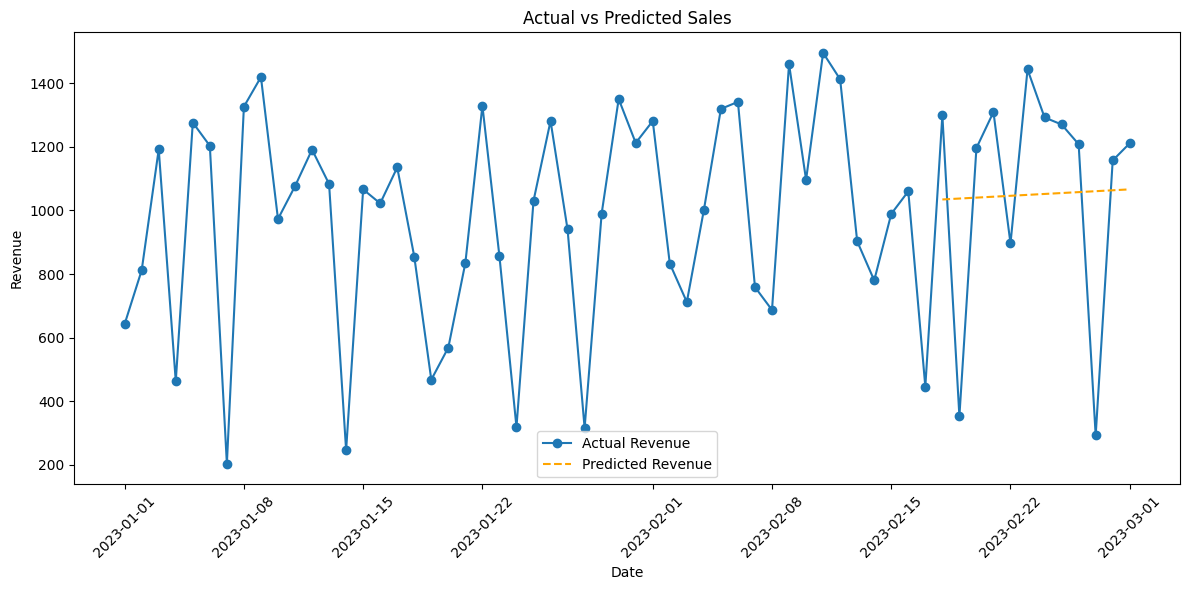

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset
df = pd.read_csv('sales_data_for_forecasting.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Data preprocessing
df = df.dropna()  # handle null values
df = df.sort_values('Date')

# Step 3: Aggregate revenue by date
daily_sales = df.groupby('Date')['Revenue'].sum().reset_index()

# Step 4: Feature engineering (convert Date to ordinal)
daily_sales['Date_Ordinal'] = daily_sales['Date'].apply(lambda x: x.toordinal())

# Step 5: Train-Test Split
X = daily_sales[['Date_Ordinal']]
y = daily_sales['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 6: Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Prediction
y_pred = model.predict(X_test)

# Step 8: Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Step 9: Visualization
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Revenue'], label='Actual Revenue', marker='o')
plt.plot(daily_sales['Date'].iloc[-len(y_test):], y_pred, label='Predicted Revenue', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


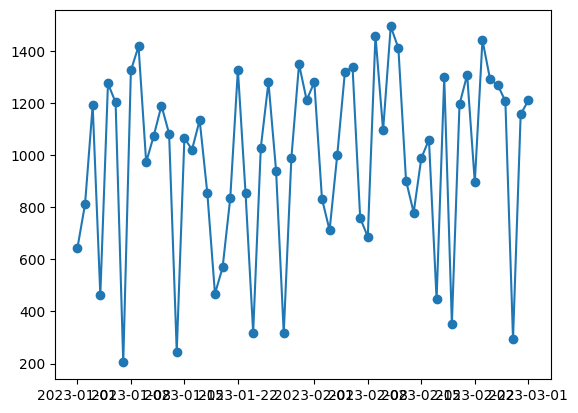

In [4]:
plt.plot(daily_sales['Date'], daily_sales['Revenue'], label='Actual Revenue', marker='o')